In [4]:
import tensorflow as tf
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
import seaborn as sn 
import pandas as pd
import matplotlib.pyplot as plt 

X= loadmat(r'C:\Users\Tutku\PycharmProjects\pythonProject24\Salinas.mat')['salinas']
Y= loadmat(r'C:\Users\Tutku\PycharmProjects\pythonProject24\Salinas_gt.mat')['salinas_gt']

x_ = X.reshape((512*217, 224))
y = Y.reshape((512*217, 1))
print(x_.shape, y_.shape)

(111104, 224) (111104, 1)


In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

x = sc_X.fit_transform(x_)

(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.25, random_state=0, stratify=y)

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(17, activation = tf.nn.softmax))

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
import numpy as np

In [12]:
model.fit(x_train, y_train, batch_size=256, epochs=150)

Epoch 1/150
326/326 [==============================] - 2s 4ms/step - loss: 1.1923 - accuracy: 0.6429
Epoch 2/150
326/326 [==============================] - 1s 4ms/step - loss: 0.5028 - accuracy: 0.8025
Epoch 3/150
326/326 [==============================] - 1s 3ms/step - loss: 0.4099 - accuracy: 0.8432
Epoch 4/150
326/326 [==============================] - 1s 4ms/step - loss: 0.3631 - accuracy: 0.8642
Epoch 5/150
326/326 [==============================] - 1s 3ms/step - loss: 0.3355 - accuracy: 0.8742
Epoch 6/150
326/326 [==============================] - 1s 4ms/step - loss: 0.3108 - accuracy: 0.8862
Epoch 7/150
326/326 [==============================] - 1s 3ms/step - loss: 0.2992 - accuracy: 0.8889
Epoch 8/150
326/326 [==============================] - 1s 4ms/step - loss: 0.2833 - accuracy: 0.8945
Epoch 9/150
326/326 [==============================] - 1s 4ms/step - loss: 0.2735 - accuracy: 0.8980
Epoch 10/150
326/326 [==============================] - 1s 4ms/step - loss: 0.2694 - accura

In [13]:
y_pred =  model.predict_classes(x_test)

C:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[13488,    71,    59,    63,    31,    39,    94,    55,    67,
           60,    40,    20,    49,    33,    22,    31,    22],
       [   34,   468,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [   25,     0,   906,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [   33,     0,     0,   460,     0,     1,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [   31,     0,     0,     0,   317,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [   78,     0,     0,     2,     1,   589,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [   23,     0,     0,     0,     0,     0,   967,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0],
       [   21,     0,     0,     0,     0,     0

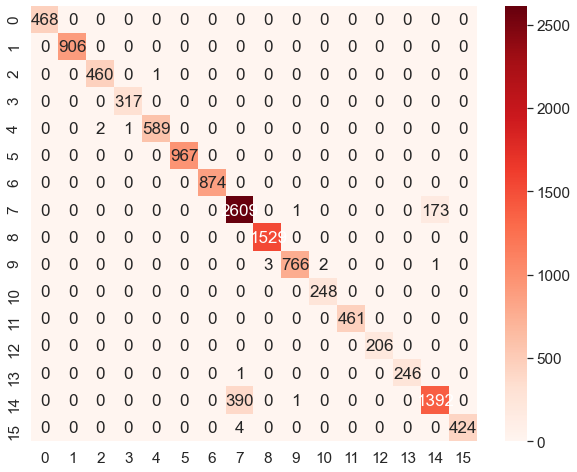

In [15]:
 df_cm = pd.DataFrame(cm[1:17, 1:17] ) # columns=np.unique(names), index = np.unique(names))


plt.figure(figsize = (10,8))

sn.set(font_scale=1.4) #for label size

sn.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 17}, fmt='d')

plt.savefig('cmap.png', dpi=300)

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.9342597926267281

In [17]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(val_loss, val_accuracy)

868/868 [==============================] - 1s 952us/step - loss: 0.2041 - accuracy: 0.9343
0.2041158229112625 0.9342597723007202


In [18]:
y_predicted = model.predict(x_test)
y_predicted[15]

array([2.2305454e-05, 1.7714007e-22, 0.0000000e+00, 1.4676512e-31,
       1.6221622e-33, 9.3067997e-35, 0.0000000e+00, 0.0000000e+00,
       1.3534756e-19, 9.9997771e-01, 5.6021292e-08, 1.3339548e-14,
       1.4787017e-13, 7.6994447e-33, 0.0000000e+00, 2.5014389e-24,
       6.4523636e-20], dtype=float32)

In [22]:
import numpy as np
print(np.argmax(y_predicted[15]))

9


In [25]:
print(x_train[155])

[-0.00575457  0.00491636 -0.12385196 -0.0954499  -0.097727   -0.09583641
 -0.10918082 -0.09968977 -0.09962113 -0.10259592 -0.09993859 -0.10227567
 -0.10241907 -0.10055143 -0.10256419 -0.10150526 -0.10113242 -0.10340225
 -0.10161839 -0.09921604 -0.09554961 -0.09275    -0.09101835 -0.09089238
 -0.08946214 -0.08776985 -0.08703136 -0.0849332  -0.08505171 -0.08505366
 -0.08733076 -0.08686325 -0.08915104 -0.09096262 -0.08840192 -0.07950855
 -0.06651215 -0.05489554 -0.02715634 -0.01390895 -0.00711693 -0.00526171
 -0.00278057 -0.00068067  0.00088735  0.00164418  0.00400483  0.00501076
  0.0070171   0.00774284  0.00956439  0.0103405   0.01261917  0.01408723
  0.01490382  0.01579599  0.01698164  0.01743803  0.01933841  0.01885824
  0.02262929  0.0246228   0.02288615  0.02162487  0.02268758  0.01979134
  0.02228949  0.02143311  0.02336162  0.02166568  0.02168807  0.02237043
  0.0209029   0.02324445  0.02229322  0.02411938  0.02376045  0.02445761
  0.02329071  0.02537924  0.02832445  0.02367361  0